In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('non_zero_data.csv')
data.head()

,adult,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,revenue,production_companies,budget,release_year,release_month,num_genres,release_season,budget_revenue_ratio
0,False,"[18, 80]",278,en,136.776,1994-09-23,The Shawshank Redemption,8.704,25822,28341469.0,['Castle Rock Entertainment'],25000000.0,1994,9,2,Fall,0.882100
1,False,"[18, 80]",238,en,107.889,1972-03-14,The Godfather,8.695,19602,245066411.0,"['Paramount', 'Alfran Productions']",6000000.0,1972,3,2,Spring,0.024483
2,False,"[18, 80]",240,en,71.355,1974-12-20,The Godfather Part II,8.576,11849,102600000.0,"['Paramount', 'The Coppola Company']",13000000.0,1974,12,2,Winter,0.126706
3,False,"[18, 36, 10752]",424,en,79.614,1993-12-15,Schindler's List,8.566,15229,321365567.0,['Amblin Entertainment'],22000000.0,1993,12,3,Winter,0.068458
4,False,"[16, 10751, 14]",129,ja,120.883,2001-07-20,Spirited Away,8.541,15705,274925095.0,['Studio Ghibli'],19000000.0,2001,7,3,Summer,0.069110


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5745 entries, 0 to 5744
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 5745 non-null   bool   
 1   genre_ids             5745 non-null   object 
 2   id                    5745 non-null   int64  
 3   original_language     5745 non-null   object 
 4   popularity            5745 non-null   float64
 5   release_date          5745 non-null   object 
 6   title                 5745 non-null   object 
 7   vote_average          5745 non-null   float64
 8   vote_count            5745 non-null   int64  
 9   revenue               5745 non-null   float64
 10  production_companies  5745 non-null   object 
 11  budget                5745 non-null   float64
 12  release_year          5745 non-null   int64  
 13  release_month         5745 non-null   int64  
 14  num_genres            5745 non-null   int64  
 15  release_season       

In [4]:
data.describe()

,id,popularity,vote_average,vote_count,revenue,budget,release_year,release_month,num_genres,budget_revenue_ratio
count,5.745000e+03,5745.000000,5745.000000,5745.000000,5.745000e+03,5.745000e+03,5745.000000,5745.000000,5745.000000,5745.000000
mean,1.295379e+05,35.501507,6.630684,2706.511923,1.091273e+08,3.628044e+07,2003.085988,7.044560,2.684595,68.181639
std,2.033229e+05,38.159271,0.774388,3668.241251,1.928114e+08,4.461550e+07,15.639287,3.390513,1.014903,4543.623542
min,5.000000e+00,0.600000,2.899000,300.000000,2.000000e+00,5.000000e+00,1915.000000,1.000000,1.000000,0.000241
25%,8.832000e+03,20.756000,6.122000,639.000000,1.323146e+07,8.000000e+06,1996.000000,4.000000,2.000000,0.222150
50%,1.349700e+04,27.424000,6.644000,1344.000000,4.270000e+07,2.000000e+07,2007.000000,7.000000,3.000000,0.444435
75%,2.079320e+05,39.597000,7.182000,3125.000000,1.197000e+08,4.500000e+07,2014.000000,10.000000,3.000000,1.013088
max,1.160164e+06,1398.123000,8.704000,35429.000000,2.923706e+09,4.600000e+08,2024.000000,12.000000,7.000000,344112.500000


# Converting categorical to numeric
map each seasons with a unique value to represent it. Using label encoder, we convert production company to a numeric value. THis is done for correlation.

In [5]:
# Define a mapping for seasons to numeric values
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}

# Apply the mapping to the 'release_season' column
data['release_season_numeric'] = data['release_season'].map(season_mapping)

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'production_companies' column
data['production_companies_numeric'] = label_encoder.fit_transform(data['production_companies'])

# Drop the original 'release_season','production_companies' column
data.drop(columns=['release_season','production_companies'], inplace=True)
data.head()

,adult,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,revenue,budget,release_year,release_month,num_genres,budget_revenue_ratio,release_season_numeric,production_companies_numeric
0,False,"[18, 80]",278,en,136.776,1994-09-23,The Shawshank Redemption,8.704,25822,28341469.0,25000000.0,1994,9,2,0.882100,3,741
1,False,"[18, 80]",238,en,107.889,1972-03-14,The Godfather,8.695,19602,245066411.0,6000000.0,1972,3,2,0.024483,1,3025
2,False,"[18, 80]",240,en,71.355,1974-12-20,The Godfather Part II,8.576,11849,102600000.0,13000000.0,1974,12,2,0.126706,4,3177
3,False,"[18, 36, 10752]",424,en,79.614,1993-12-15,Schindler's List,8.566,15229,321365567.0,22000000.0,1993,12,3,0.068458,4,251
4,False,"[16, 10751, 14]",129,ja,120.883,2001-07-20,Spirited Away,8.541,15705,274925095.0,19000000.0,2001,7,3,0.069110,2,3889


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5745 entries, 0 to 5744
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   adult                         5745 non-null   bool   
 1   genre_ids                     5745 non-null   object 
 2   id                            5745 non-null   int64  
 3   original_language             5745 non-null   object 
 4   popularity                    5745 non-null   float64
 5   release_date                  5745 non-null   object 
 6   title                         5745 non-null   object 
 7   vote_average                  5745 non-null   float64
 8   vote_count                    5745 non-null   int64  
 9   revenue                       5745 non-null   float64
 10  budget                        5745 non-null   float64
 11  release_year                  5745 non-null   int64  
 12  release_month                 5745 non-null   int64  
 13  num

# Which variable is the top predictor of ratings?
Renaming vote_average to ratings. Looking at numeric data relation with ratings.

In [7]:
data.rename(columns={'vote_average': 'ratings'}, inplace=True)
# Filter out numeric columns
numeric_data = data.select_dtypes(include=['number'])
numeric_data.head()

,id,popularity,ratings,vote_count,revenue,budget,release_year,release_month,num_genres,budget_revenue_ratio,release_season_numeric,production_companies_numeric
0,278,136.776,8.704,25822,28341469.0,25000000.0,1994,9,2,0.882100,3,741
1,238,107.889,8.695,19602,245066411.0,6000000.0,1972,3,2,0.024483,1,3025
2,240,71.355,8.576,11849,102600000.0,13000000.0,1974,12,2,0.126706,4,3177
3,424,79.614,8.566,15229,321365567.0,22000000.0,1993,12,3,0.068458,4,251
4,129,120.883,8.541,15705,274925095.0,19000000.0,2001,7,3,0.069110,2,3889


In [8]:
correlation = numeric_data.corr()['ratings'].abs().sort_values(ascending=False)

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Sort the correlations with 'vote_average' in descending order
vote_average_correlation = correlation_matrix['ratings'].sort_values(ascending=False)
# Display the top predictors of 'vote_average'
print("Top predictors of ratings: \n")
print(vote_average_correlation)

Top predictors of ratings: 

ratings                         1.000000
vote_count                      0.367620
popularity                      0.193538
revenue                         0.171017
release_month                   0.129562
id                              0.086649
release_season_numeric          0.042724
production_companies_numeric    0.033340
budget_revenue_ratio           -0.012907
budget                         -0.014251
num_genres                     -0.063767
release_year                   -0.190255
Name: ratings, dtype: float64


# Model training.

Explore and determine which model is suitable for this regrssion problem. Using Multi-Variate linear regression model with the 3 most suitable predictor: vote_count, popularity, and revenue

# Model 1: Linear Regression

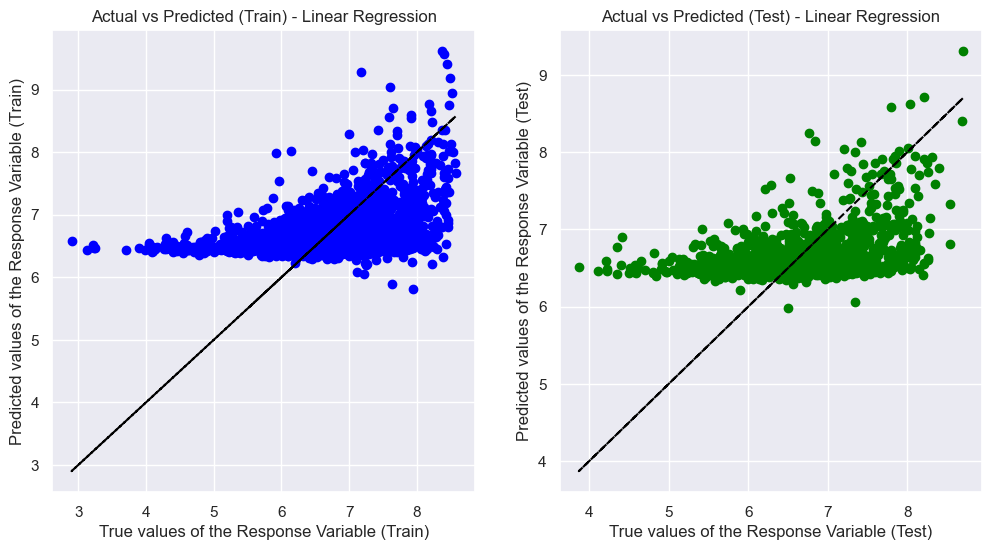

Linear Regression:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.16086416295455952
Mean Squared Error (MSE) 	: 0.506966071112281

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.16421253356408483
Mean Squared Error (MSE) 	: 0.4896380086939654



In [9]:
# linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

predictors = ["popularity", "vote_count", "revenue"]

# Extract predictors and response variable
X = pd.DataFrame(data[predictors])
y = pd.DataFrame(data['ratings'])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize and train Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predictions
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)


# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot(y_train, y_train, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Train)')
plt.ylabel('Predicted values of the Response Variable (Train)')
plt.title('Actual vs Predicted (Train) - Linear Regression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green')
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Test)')
plt.ylabel('Predicted values of the Response Variable (Test)')
plt.title('Actual vs Predicted (Test) - Linear Regression')

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Linear Regression:")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Model 2: Decision Tree Regressor

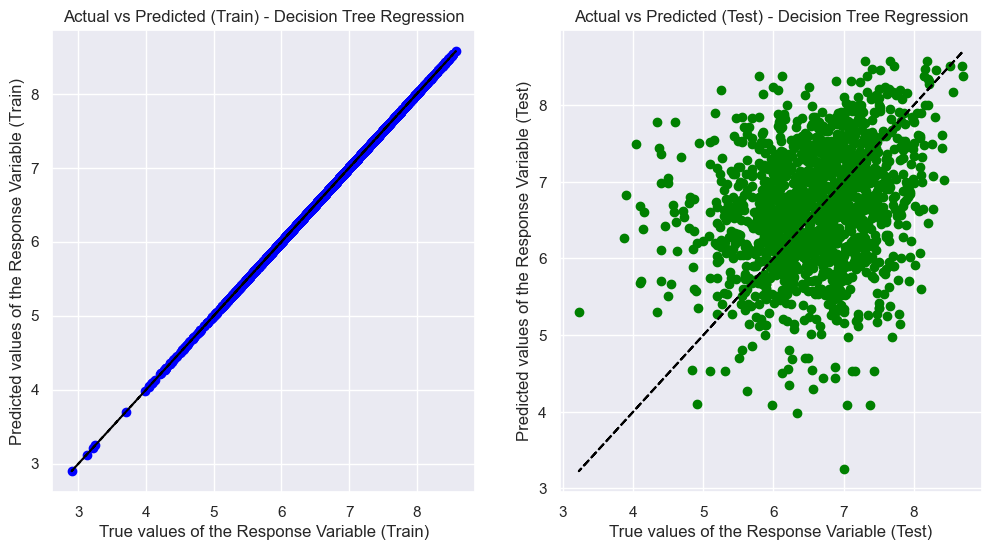

Decision Tree Regression:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9999999968499567
Mean Squared Error (MSE) 	: 1.8570102135557654e-09

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.5037283525515097
Mean Squared Error (MSE) 	: 0.9419531266527489



In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

predictors = ["popularity", "vote_count", "revenue"]

# Extract predictors and response variable
X = pd.DataFrame(data[predictors])
y = pd.DataFrame(data['ratings'])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize and train Linear Regression model
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

# Predictions
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)


# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot(y_train, y_train, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Train)')
plt.ylabel('Predicted values of the Response Variable (Train)')
plt.title('Actual vs Predicted (Train) - Decision Tree Regression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green')
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Test)')
plt.ylabel('Predicted values of the Response Variable (Test)')
plt.title('Actual vs Predicted (Test) - Decision Tree Regression')

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Decision Tree Regression:")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", dt_reg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", dt_reg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

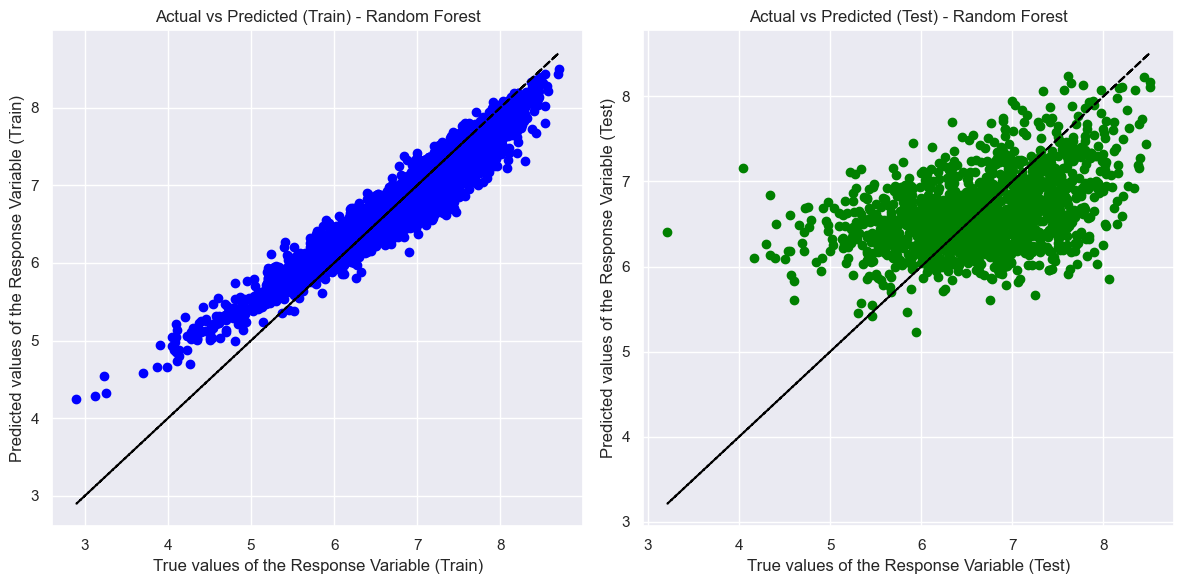

Random Forest Regression:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8799940459857236
Mean Squared Error (MSE) 	: 0.07164553730763694

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.17029389622128888
Mean Squared Error (MSE) 	: 0.5038044378977731



In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming data is your DataFrame containing the data
predictors = ["popularity", "vote_count", "revenue"]
response = "ratings"

# Extract predictors and response variable
X = data[predictors]
y = data[response]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize and train Random Forest Regression model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)


# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_rf, color='blue')
plt.plot(y_train, y_train, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Train)')
plt.ylabel('Predicted values of the Response Variable (Train)')
plt.title('Actual vs Predicted (Train) - Random Forest')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_rf, color='green')
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Test)')
plt.ylabel('Predicted values of the Response Variable (Test)')
plt.title('Actual vs Predicted (Test) - Random Forest')

plt.tight_layout()
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Random Forest Regression:")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, y_train_pred_rf))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_rf))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, y_test_pred_rf))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_rf))
print()

We can see that in test dataset, Random Forest regression is better than the rest with highest explained variance abut behind linear regression in terms of Mean Squared error. however we do note that Random Forest Regression is only slightly worst than Linear regression.
When we look at test Dataset, Decision tree is best while comparing linear regression and random forest regression, we can see that random forest is better than linear regression with higher explained variance and lower Mean Squared Error.
Looking at the overall, Random Forest is the better model and is more suitable.

# Prediction of Ratings
Can we predict the ratings value of movies using the Regression Model derived above?
Predict the ratings of the movie "Furious 7", "Out of Time", and "Jumanji"

In [12]:
movie_ratings_pred = data[data["title"].isin(["Furious 7", "Out of Time", "Jumanji"])]
movie_ratings_pred

,adult,genre_ids,id,original_language,popularity,release_date,title,ratings,vote_count,revenue,budget,release_year,release_month,num_genres,budget_revenue_ratio,release_season_numeric,production_companies_numeric
1298,False,"[12, 14, 10751]",8844,en,15.274,1995-12-15,Jumanji,7.241,10117,2.628219e+08,65000000.0,1995,12,3,0.247316,4,4255
1311,False,"[28, 53, 80]",168259,en,72.224,2015-04-01,Furious 7,7.235,10251,1.515400e+09,190000000.0,2015,4,3,0.125379,1,2933
3776,False,"[53, 80, 18]",2116,en,22.758,2003-10-03,Out of Time,6.325,1101,5.549556e+07,50000000.0,2003,10,3,0.900973,3,2621


In [13]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(movie_ratings_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = rf_reg.predict(X_pred)
y_pred

array([7.37674, 7.13933, 6.28012])

In [14]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns=["PredRatings"], index=movie_ratings_pred.index)
moviedata_acc = pd.concat([movie_ratings_pred[["title", "ratings"]], y_pred], axis=1)

y_errs = abs(movie_ratings_pred["ratings"] - y_pred["PredRatings"]) / movie_ratings_pred["ratings"]
y_errs = pd.DataFrame(y_errs, columns=["Error"], index=movie_ratings_pred.index)
moviedata_acc = pd.concat([moviedata_acc, y_errs], axis=1)

moviedata_acc

,title,ratings,PredRatings,Error
1298,Jumanji,7.241,7.37674,0.018746
1311,Furious 7,7.235,7.13933,0.013223
3776,Out of Time,6.325,6.28012,0.007096


The model has predicted the ratings rather accurately. Therefore if the goal is to ensure the movie ratings are as high as possible, one can focus on the three variable "popularity", "vote_count", "revenue".